In [ ]:
Q 1) Can we use Bagging for regression problems?
>> Yes, bagging (Bootstrap Aggregating) is highly effective for regression problems 

In [ ]:
Q 2) What is the difference between multiple model training and single model training?
>>  Single model training involves training one model on all available data features for broad, consistent, and simpler management. 
    In contrast, multiple model training involves creating specialized, separate models for different subsets of data, categories, or tasks,
   which often provides higher accuracy at the cost of increased complexity and resource usag

In [ ]:
Q 3) Explain the concept of feature randomness in Random Forest.
>> at each decision node during the construction of an individual decision tree, only a random subset of the available features is considered
    for the best split, rather than all features. 

In [ ]:
Q 4) What is OOB (Out-of-Bag) Score?
>> an unbiased, internal evaluation metric for Bagging-based machine learning models (like Random Forests) that measures prediction accuracy using
   samples not included in the bootstrap training set

In [ ]:
Q 5) How can you measure the importance of features in a Random Forest model?
>> using the Mean Decrease in Impurity (MDI), also known as Gini Importance, which sums the impurity reduction (like Gini impurity or entropy) 
 provided by a feature across all trees and nodes, weighted by the number of samples reaching that node, then averages these scores over the entire
 forest. 

In [ ]:
Q 6) Explain the working principle of a Bagging Classifier.
>> training multiple independent base models (typically high-variance models like decision trees) on different random subsets of the training data 
  and then combining their predictions to produce a more robust and accurate final result

In [ ]:
Q 7) How do you evaluate a Bagging Classifier’s performance?
>>  measuring its performance on unseen data using metrics like accuracy, precision, recall, and F1-score, alongside specialized techniques such as
   Out-of-Bag (OOB) error estimation and cross-validation to ensure model stability and reduced variance

In [ ]:
Q 8) How does a Bagging Regressor work?
>> building multiple, independent regression models (typically decision trees) on random subsets of the data and averaging their predictions. 

In [ ]:
Q 9) What is the main advantage of ensemble techniques?
>>  significantly improved prediction accuracy and model robustness

In [ ]:
Q 10) What is the main challenge of ensemble methods?
>> significantly increased computational cost and resource consumption due to training and maintaining multiple, often complex, models simultaneously.

In [ ]:
Q 11) Explain the key idea behind ensemble techniques?
>> to combine multiple, diverse, and often "weak" machine learning models to create one "strong" learner that delivers superior, more robust, 
    and more accurate predictions than any single model could alone.

In [ ]:
Q 12) What is a Random Forest Classifier?
>>  a powerful, supervised machine learning algorithm that builds multiple decision trees during training and merges their results to make more
accurate and stable predictions.

In [ ]:
Q 13) What are the main types of ensemble techniques
>> Bagging (like Random Forest) for reducing variance by parallel training on data subsets, Boosting (like AdaBoost, XGBoost) for reducing bias by
   sequential training, focusing on previous errors, and Stacking (Stacked Generalization) that combines diverse models using a meta-model for final
  predictions. 

In [ ]:
Q 14) What is ensemble learning in machine learning
>> a machine learning technique that combines multiple individual models (often called "weak learners") to create a single, stronger, and more robust
   predictive model

In [ ]:
Q 15) When should we avoid using ensemble methods
>> when interpretability is required, computational resources are limited, or the model needs to be deployed in real-time. 

In [ ]:
Q 16) How does Bagging help in reducing overfitting
>> training multiple base models (e.g., decision trees) in parallel on random subsets of the data created with replacement (bootstrapping)

In [ ]:
Q 17) Why is Random Forest better than a single Decision Tree
>> it significantly reduces overfitting, leading to higher accuracy and robustness by averaging predictions from multiple diverse trees

In [ ]:
Q 18) What is the role of bootstrap sampling in Bagging
>> creates diverse, random subsets of training data by sampling with replacement.

In [ ]:
Q 19) What are some real-world applications of ensemble techniques
>>  finance (fraud detection, credit scoring), healthcare (disease diagnosis, patient risk), e-commerce (recommendations, churn prediction),
     cybersecurity (intrusion detection, malware), and weather forecasting (storm prediction) 

In [ ]:
Q 20) What is the difference between Bagging and Boosting?
>> Bagging treats all models equally, while boosting weights models based on performance. 

# PRACTICAL

In [ ]:
Q 21) Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

base_tree = DecisionTreeClassifier(random_state=42)

bagging_clf = BaggingClassifier(
    estimator=base_tree,
    n_estimators=100,
    random_state=42,
    n_jobs=-1 
)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Bagging Classifier: {accuracy:.4f}")

Accuracy of the Bagging Classifier: 0.9474


In [ ]:
Q 22) Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

base_estimator = DecisionTreeRegressor()

bagging_model = BaggingRegressor(
    base_estimator=base_estimator,
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")

In [ ]:
Q 23) Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

importances = rf_clf.feature_importances_
feature_names = data.feature_names

feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importances:")
print(feature_imp_df.head(10).to_string(index=False))

Top 10 Feature Importances:
             Feature  Importance
 mean concave points    0.141934
worst concave points    0.127136
          worst area    0.118217
      mean concavity    0.080557
        worst radius    0.077975
     worst perimeter    0.074292
      mean perimeter    0.060092
           mean area    0.053810
     worst concavity    0.041080
         mean radius    0.032312


In [ ]:
Q 24) Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X = np.random.rand(100, 5)
y = np.dot(X, [1.5, -2, 3, 0.5, 1]) + np.random.randn(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("RF MSE:", mean_squared_error(y_test, rf_preds))
print("DT MSE:", mean_squared_error(y_test, dt_preds))

RF MSE: 0.497753729513739
DT MSE: 1.65759283298822


In [ ]:
Q 25) Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4, random_state=42)

clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
clf.fit(X, y)

print(f"OOB Score: {clf.oob_score_}")
print(f"OOB Error: {1 - clf.oob_score_}")

OOB Score: 0.919
OOB Error: 0.08099999999999996


In [ ]:
Q 26) Train a Bagging Classifier using SVM as a base estimator and print accuracy

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=10, n_informative=5, 
                           n_redundant=1, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


svm_base = SVC(kernel='rbf', random_state=42)


bagging_clf = BaggingClassifier(
    base_estimator=svm_base,
    n_estimators=10, 
    random_state=42,
    n_jobs=-1 
)

bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Bagging Classifier with SVM base estimator: {accuracy:.4f}")

In [ ]:
Q 27) Train a Random Forest Classifier with different numbers of trees and compare accuracy

Training models and comparing accuracies:
Number of trees: 10, Accuracy: 1.0000
Number of trees: 50, Accuracy: 1.0000
Number of trees: 100, Accuracy: 1.0000
Number of trees: 200, Accuracy: 1.0000
Number of trees: 500, Accuracy: 1.0000


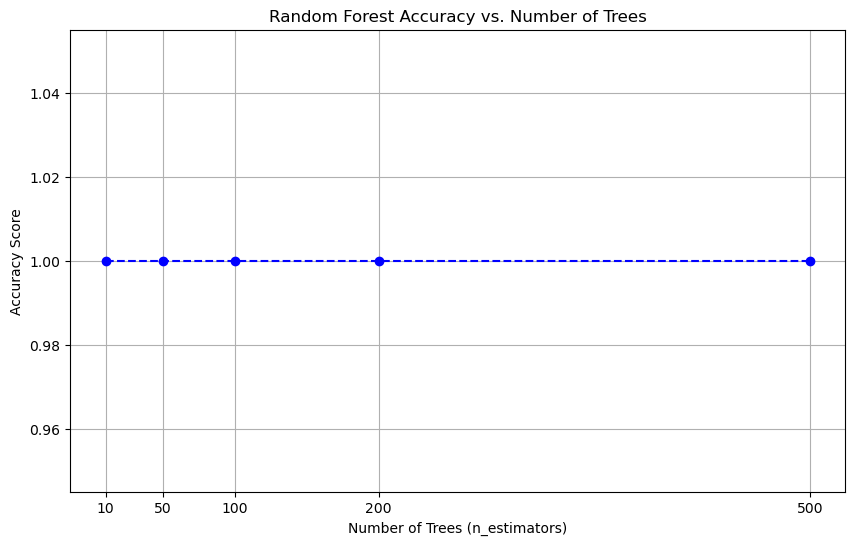

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators_list = [10, 50, 100, 200, 500]
accuracies = []

print("Training models and comparing accuracies:")
for n_trees in n_estimators_list:
    rf_classifier = RandomForestClassifier(n_estimators=n_trees, random_state=42)

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Number of trees: {n_trees}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='--', color='b')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(n_estimators_list)
plt.show()

In [ ]:
Q 28) Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


base_lr = LogisticRegression(random_state=42, solver='liblinear')


bagging_clf = BaggingClassifier(
    base_estimator=base_lr,
    n_estimators=10,
    random_state=42,
    n_jobs=1 
)

bagging_clf.fit(X_train, y_train)


y_pred_proba = bagging_clf.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"AUC Score of the Bagging Classifier: {auc_score:.4f}")

In [ ]:
Q 29) Train a Random Forest Regressor and analyze feature importance scores

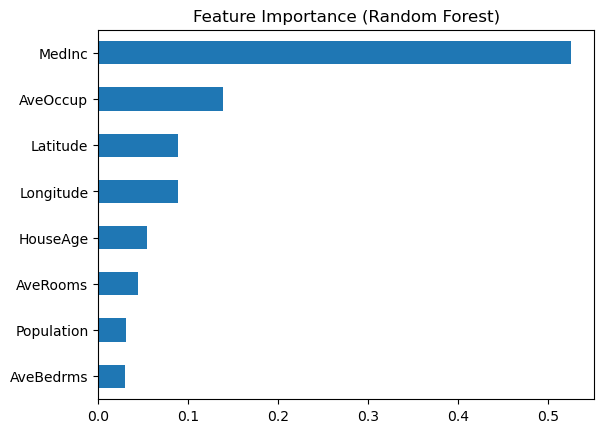

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

housing = fetch_california_housing(as_frame=True)
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

feat_importances.plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [ ]:
Q 30) Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42
)
bagging_clf.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging_clf.predict(X_test))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"Bagging Accuracy: {bagging_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")


In [ ]:
Q 31) Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_informative=10, 
    n_redundant=5, 
    n_classes=2, 
    random_state=42
)

X_df = pd.DataFrame(X)
y_series = pd.Series(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_series, test_size=0.3, random_state=42, stratify=y_series
)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],          
    'max_depth': [10, 20, None],         
    'min_samples_split': [2, 5],         
    'min_samples_leaf': [1, 2],          
    'criterion': ['gini', 'entropy']     
}

grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    verbose=0,
    n_jobs=-1          
)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score_cv = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy score: {best_score_cv:.4f}")

y_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy using the tuned model: {test_accuracy:.4f}")


Best parameters found: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy score: 0.9257
Test set accuracy using the tuned model: 0.9300


In [ ]:
Q 34) Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=10,                       
    random_state=42,
    bootstrap=True,                        
    n_jobs=1                               
)
bagging_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)
bagging_predictions = bagging_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)

print("--- Performance Comparison ---")
print(f"Single Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Bagging Classifier Accuracy:   {bagging_accuracy:.4f}")
print("\n--- Detailed Decision Tree Report ---")
print(classification_report(y_test, dt_predictions))
print("\n--- Detailed Bagging Classifier Report ---")
print(classification_report(y_test, bagging_predictions))

In [ ]:
Q 35) Train a Random Forest Classifier and visualize the confusion matrix

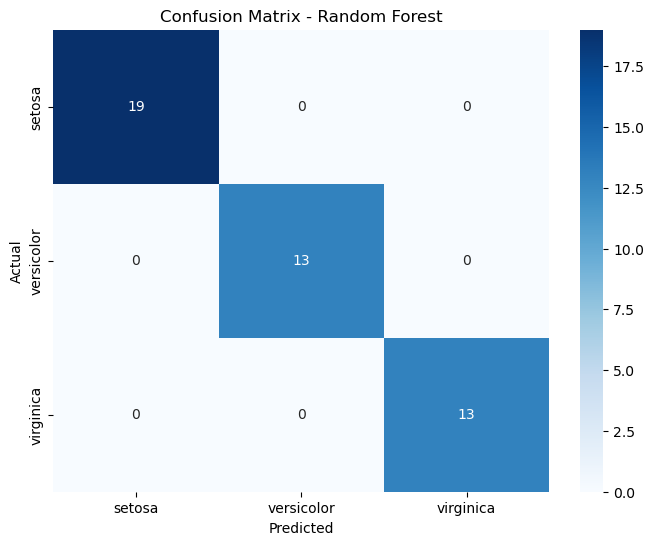

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()
